Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [193]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [166]:
d2015 = pd.read_csv('archive/2015.csv')
d2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
d2015['Year'] = 2015

d2016 = pd.read_csv('archive/2016.csv')
d2016.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
d2016['Year'] = 2016

d2017 = pd.read_csv('archive/2017.csv')
d2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Upper Confidence Interval', 'Lower Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']
d2017['Year'] = 2017

d2018 = pd.read_csv('archive/2018.csv')
d2018.columns = ['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
d2018['Year'] = 2018

d2019 = pd.read_csv('archive/2019.csv')
d2019.columns = ['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
d2019['Year'] = 2019

data = pd.concat([d2015, d2016, d2017, d2018, d2019])
data['Year'] = data.Year.astype('Int64')
data.describe()

,Happiness_Rank,Happiness_Score,Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
count,782.000000,782.000000,158.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000,782.000000,312.000000,312.000000
mean,78.698210,5.379018,0.047885,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717,2016.993606,5.269139,5.467245
std,45.182384,1.127456,0.017146,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772,1.417364,1.144780,1.125895
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,2.521116,2.864884
25%,40.000000,4.509750,0.037268,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975,2016.000000,4.366000,4.551835
50%,79.000000,5.322000,0.043940,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640,2017.000000,5.211295,5.394889
75%,118.000000,6.189500,0.052300,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575,2018.000000,6.086750,6.382650
max,158.000000,7.769000,0.136930,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000,7.479556,7.669000


In [177]:
data_happiness = data.pivot_table(index = 'Year', columns = 'Country', values = 'Happiness_Score', aggfunc = 'max')
data_happiness.head()

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2015,3.575,4.959,5.605,4.033,6.574,4.350,7.284,7.200,5.212,5.960,...,6.901,6.867,7.119,6.485,6.003,6.810,5.360,4.077,5.129,4.610
2016,3.360,4.655,6.355,3.866,6.650,4.360,7.313,7.119,5.291,6.218,...,6.573,6.725,7.104,6.545,5.987,6.084,5.061,3.724,4.795,4.193
2017,3.794,4.644,5.872,3.795,6.599,4.376,7.284,7.006,5.234,6.087,...,6.648,6.714,6.993,6.454,5.971,5.250,5.074,3.593,4.514,3.875
2018,3.632,4.586,5.295,3.795,6.388,4.321,7.272,7.139,5.201,6.105,...,6.774,7.190,6.886,6.379,6.096,4.806,5.103,3.355,4.377,3.692
2019,3.203,4.719,5.211,NaN,6.086,4.559,7.228,7.246,5.208,6.199,...,6.825,7.054,6.892,6.293,6.174,4.707,5.175,3.380,4.107,3.663


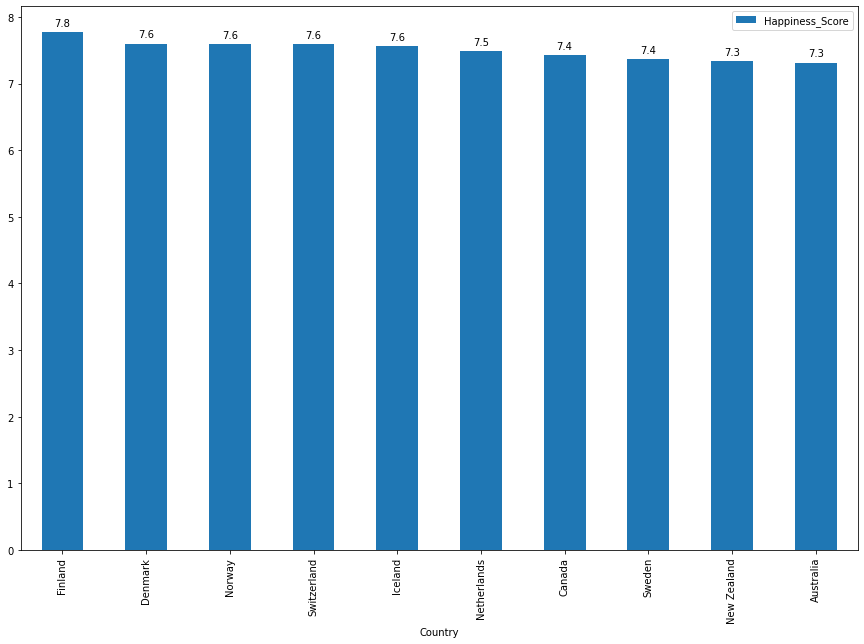

In [194]:
#топ-10 стран по рейтингу счастья (5-летний максимум)
top5_countries = data[['Country', 'Happiness_Score']].groupby(by=['Country']).max().sort_values(by='Happiness_Score', ascending=False).head(10)
ax = top5_countries.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

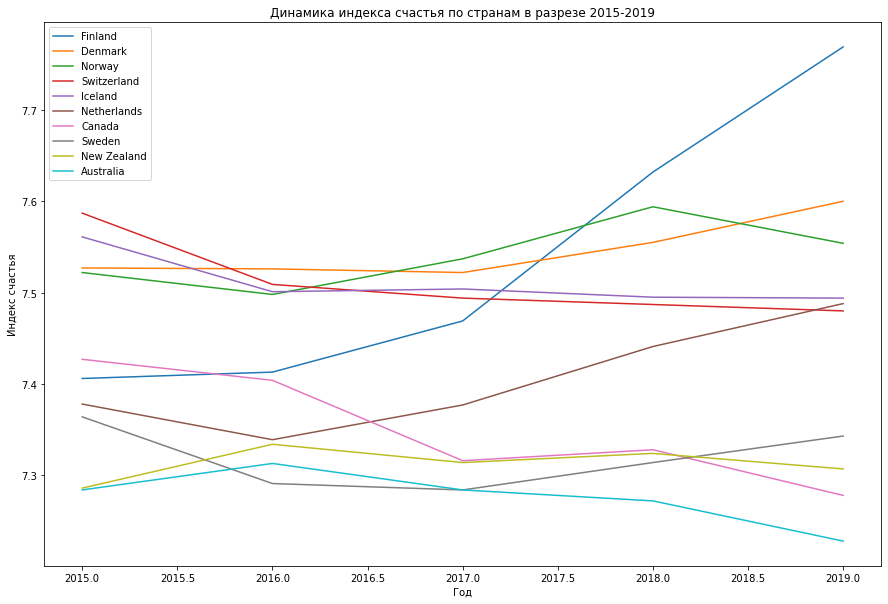

In [195]:
#динамика  рейтинга счастья в странах и3 топ-10 (2015-2019)
plt.plot(data_happiness.index, data_happiness.loc[:, ['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland', 'Netherlands', 'Canada', 'Sweden', 'New Zealand', 'Australia']])
plt.title('Динамика индекса счастья по странам в разрезе 2015-2019')
plt.xlabel('Год')
plt.ylabel('Индекс счастья') 
plt.legend(data_happiness.loc[:, ['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland', 'Netherlands', 'Canada', 'Sweden', 'New Zealand', 'Australia']])

Conclision:
- Finland's Happiness Score shows dramatic rise in 2017-2019,
- overall Happiness Score of top-10 countries shows a decline since 2018.

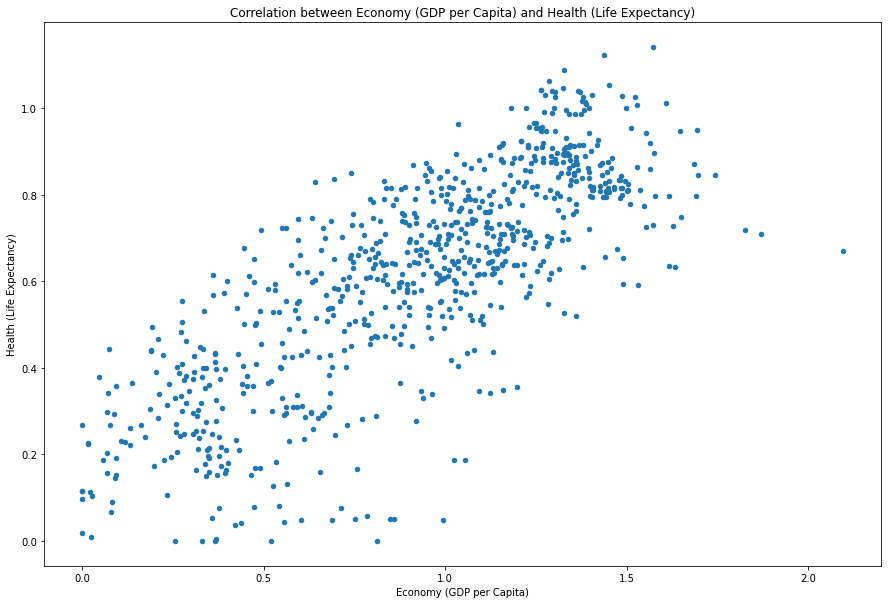

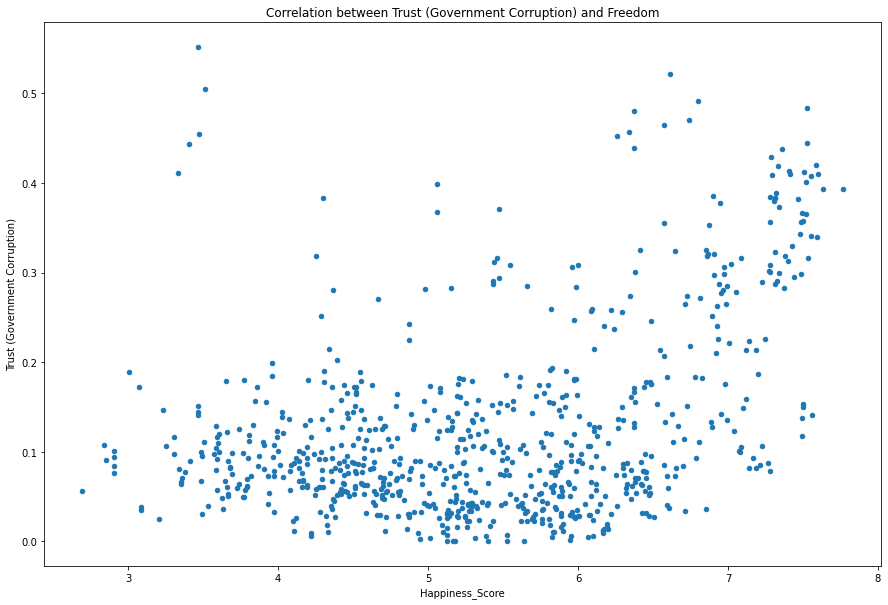

In [199]:
#корреляция между свободой и рейтингом счастья
data.plot(kind='scatter', 
        x='Economy (GDP per Capita)', 
        y='Health (Life Expectancy)', 
        title='Correlation between Economy (GDP per Capita) and Health (Life Expectancy)')

#корреляция между доверием к правительству и рейтингом счастья
data.plot(kind='scatter', 
        x='Happiness_Score', 
        y='Trust (Government Corruption)', 
        title='Correlation between Trust (Government Corruption) and Freedom')

Conclusion:
- it seems like the higher GDP per capita the higher Healthy life expectancy is,
- here seems to no much relation between Healthy life expectancy and happiness score,



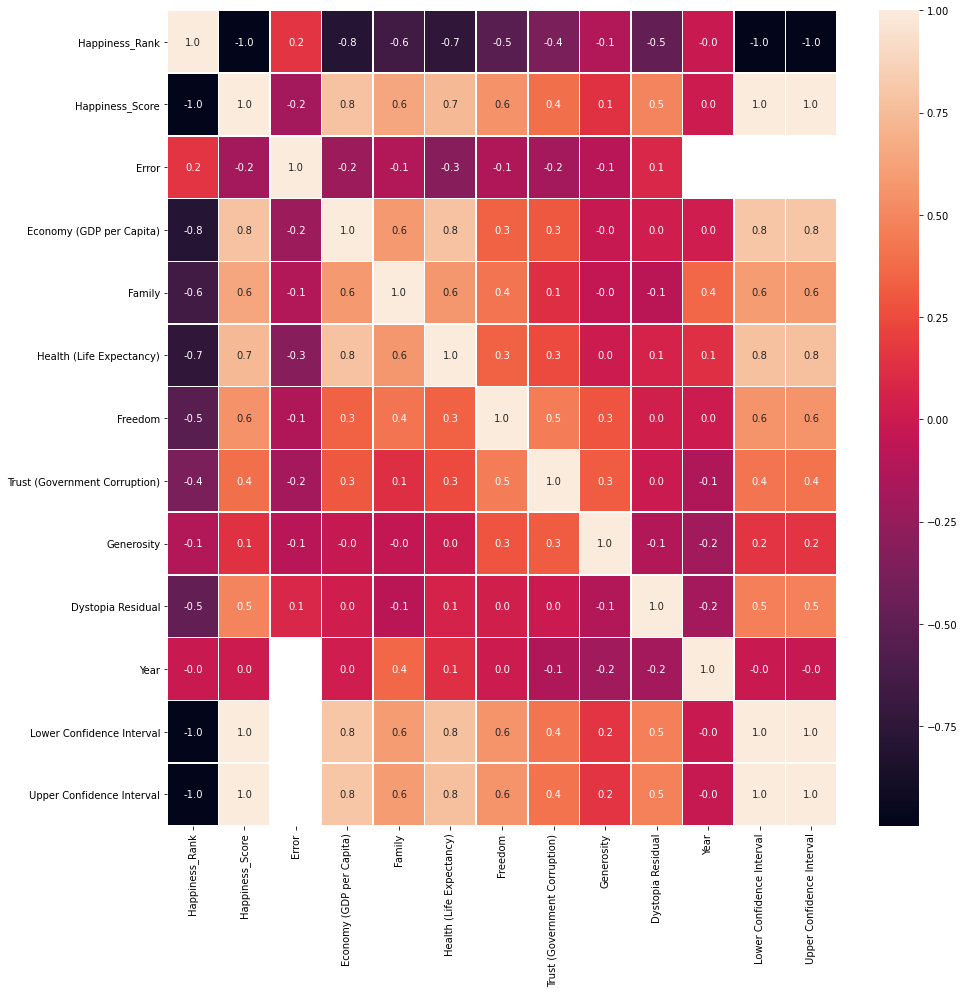

In [202]:
import seaborn as sns 
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True, linewidth=.5,fmt='.1f',ax=ax)
plt.show()

According to heatmap we can say:

- Economy (GDP per capita) is strongly related with Happiness Score, Family (social support) and Health(life expectancy),
- Family is strongly related with Happiness Score, Health and Economy
- Health is strongly related with Happiness Score, Family and Economy
- Generosity not much related with Happiness Score, Family, Happiness and Economy


Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;